In [49]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# # File to Load (Remember to change these)
# city_data_to_load = "data/city_data.csv"
# ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

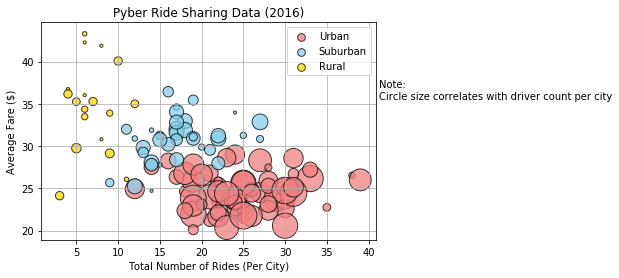

In [65]:
# Obtain the x and y coordinates for each of the three city types
grouped_df = combined_data.groupby(["city"])
only_urban = combined_data[combined_data["type"] == "Urban"]
only_suburban = combined_data[combined_data["type"] == "Suburban"]
only_rural = combined_data[combined_data["type"] == "Rural"]

# #Urban Info
urban_out = only_urban.groupby(["city"]).mean()
urban_fare_av = urban_out.iloc[:,0]
urban_drv_ct = (urban_out.iloc[:,2])*10
urban_count = only_urban.groupby(['city']).count()
urban_count = urban_count.iloc[:,0]

# #Suburban Info
suburban_out = only_suburban.groupby(["city"]).mean()
suburban_fare_av = suburban_out.iloc[:,0]
suburban_drv_ct = (suburban_out.iloc[:,2])*10
suburban_count = only_suburban.groupby(['city']).count()
suburban_count = suburban_count.iloc[:,0]

# #Rural Info
rural_out = only_rural.groupby(["city"]).mean()
rural_fare_av = rural_out.iloc[:,0]
rural_drv_ct = (rural_out.iloc[:,2])*10
rural_count = only_rural.groupby(['city']).count()
rural_count = rural_count.iloc[:,0]

# Build the scatter plots for each city types
plt.scatter(urban_count, urban_fare_av, marker="o", facecolors="lightcoral", edgecolors="black", s=urban_drv_ct, alpha=0.75)
plt.scatter(suburban_count, suburban_fare_av, marker="o", facecolors="skyblue", edgecolors="black", s=suburban_drv_ct, alpha=0.75)
plt.scatter(rural_count, rural_fare_av, marker="o", facecolors="gold", edgecolors="black", s=rural_drv_ct, alpha=0.75)


# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(labels=["Urban", "Suburban", "Rural"], loc="best", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

# Incorporate a text label regarding circle size
plt.annotate('Note:\nCircle size correlates with driver count per city',
            xy=(1.01, .6), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=10, ha='left', va='bottom')

# Save Figure
plt.savefig("Images/BubblePlot.png")


In [51]:
# Show plot
plt.show()

## Total Fares by City Type

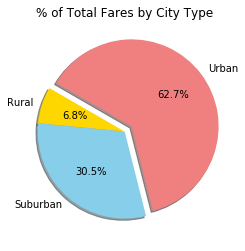

In [69]:
# Calculate Type Percents
grouped_type = combined_data.groupby(['type'])
total_fares = grouped_type['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)
colors = ["gold", "skyblue", "lightcoral"]

plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Pie_FaresByCity.png")



In [53]:
# Show Figure
plt.show()

## Total Rides by City Type

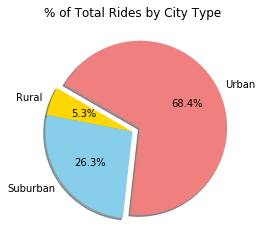

In [54]:
# Calculate Ride Percents
grouped_type = combined_data.groupby(['type'])
total_fares = grouped_type['fare'].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)
colors = ["gold", "skyblue", "lightcoral"]

plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Pie_TotalRidesByCity.png")

In [55]:
# Show Figure
plt.show()

## Total Drivers by City Type

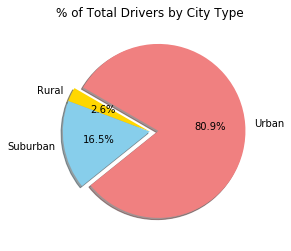

In [56]:
# Driver Percents
grouped_type = city_data.groupby(['type'])
driver_count = grouped_type['driver_count'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)
colors = ["gold", "skyblue", "lightcoral"]

plt.pie(driver_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Pie_TotalDriversByCity.png")

In [70]:
# Show Figure
plt.show()